DEBUG:get_data:Trying to load data
INFO:get_data:DONE
[INFO] FB    : 0.9290


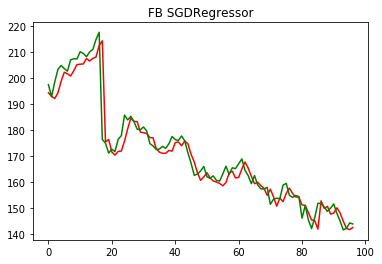

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor

import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# get_data_block_start
from get_data import GetData

getData = GetData()

accuracy = {}
meanSquaredError = {}

symbols = getData.getAllSymbols()

# Situation 2: Use yesterday's 'open' 'low' 'hign' price to predict current day's 'close' price #
# Result: Still high accracy, some stocks are extremly unaccurare

# for symbol in symbols:
for symbol in ['FB']:

    # data column: Date|Open|High|Low|Close|Adj_Close
    allFeatures = getData.getSymbolFeatures(symbol)

    accuracy[symbol] = []
    meanSquaredError[symbol] = []

    result = []
    features = []

    for feature in allFeatures:
        result.append(feature[4])
        features.append([feature[1], feature[2], feature[3]])

    # create train and test data set #
    X_train = features[0:900]
    y_train = result[1:901]
    X_test = features[901:998]
    y_test = result[902:999]

    reg = SGDRegressor(max_iter=1000000, loss='squared_loss', penalty='l2', shuffle=False, tol=1e-3, eta0=0.0001).fit(X_train, y_train)

    # predict data #
    y_pred = reg.predict(X_test)

    # accuracy score: returns the coefficient of determination R^2 of the prediction
    # The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
    accuracy[symbol] = reg.score(X_test, y_test)

    # The square of the difference between the original values and the predicted values
    # It gives us the measure of how far the predictions were from the actual output
    meanSquaredError[symbol] = mean_absolute_error(y_test, y_pred)

    print("[INFO] %-6s: %3.4f" % (symbol, accuracy[symbol]), file=sys.stderr)
    
    plt.title("%s SGDRegressor" % (symbol))
    plt.plot(np.arange(0, len(y_pred), 1), y_pred, c='r')
    plt.plot(np.arange(0, len(y_test), 1), y_test, c='g')
    plt.show()
        
    
